# Выбор тарифа мобильного оператора

### Описание проекта:

В проекте осуществлен анализ данных тарифов «Смарт» и «Ультра» компании «Мегалайн» — федерального оператора сотовой связи для корректировки рекламного бюджета. Заказчиком работ является коммерческий департамент.

Предварительный анализ тарифов на осуществлен на небольшой выборке клиентов на основании данных 500 пользователей «Мегалайна». В исходных данных содержится информация о имени каждого пользователя, месте проживания, используемом тарифе, количестве звонков и сообщений за 2018 год.

### Цель проекта:
    
    Выбор предпочтительного тарифа мобильного оператора для корректировки рекламного бюджета на основании анализа поведения клиентов.

### План выполнения работы:


***1. Изучение общей информации о данных***

***2. Предобработка данных***

    2.1 Проверка на дубликаты
    
    2.2 Преобразование типов данных
    
    2.3 Расчёт дополнительных данных для пользователей
    
***3. Анализ Данных***

    3.1 Анализ минут разговора
    
    3.2 Анализ количества сообщений
    
    3.3 Анализ интернет трафика
    
    3.4 Анализ выручки по тарифам
    
***4. Проверка гипотез***

    4.1 Статистический анализ средней выручки пользователей различных тарифов
    
    4.2 Статистический анализ средней выручки пользователей из Москвы и других регионов

***5. Общий вывод***

**Используемый стек инструментов:**

    python
    pandas
    matplotlib
    numpy
    scipy
    math
    seaborn
    plotly

### Описание тарифов:

**Тариф «Смарт»**

    1. Ежемесячная плата: 550 рублей
    2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    3. Стоимость услуг сверх тарифного пакета:
       - минута разговора: 3 рубля
       - сообщение: 3 рубля
       - 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**

    1. Ежемесячная плата: 1950 рублей
    2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    3. Стоимость услуг сверх тарифного пакета:
       - минута разговора: 1 рубль
       - сообщение: 1 рубль
       - 1 Гб интернет-трафика: 150 рублей


### Описание данных:

**Таблица users (информация о пользователях):**

- ***user_id*** — уникальный идентификатор пользователя
- ***first_name*** — имя пользователя
- ***last_name*** — фамилия пользователя
- ***age*** — возраст пользователя (годы)
- ***reg_date*** — дата подключения тарифа (день, месяц, год)
- ***churn_date*** — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- ***city*** — город проживания пользователя
- ***tariff*** — название тарифного плана

**Таблица calls (информация о звонках):**

- ***id*** — уникальный номер звонка
- ***call_date*** — дата звонка
- ***duration*** — длительность звонка в минутах
- ***user_id*** — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**

- ***id*** — уникальный номер сообщения
- ***message_date*** — дата сообщения
- ***user_id*** — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**

- ***id*** — уникальный номер сессии
- ***mb_used*** — объём потраченного за сессию интернет-трафика (в мегабайтах)
- ***session_date*** — дата интернет-сессии
- ***user_id*** — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**

- ***tariff_name*** — название тарифа
- ***rub_monthly_fee*** — ежемесячная абонентская плата в рублях
- ***minutes_included*** — количество минут разговора в месяц, включённых в абонентскую плату
- ***messages_included*** — количество сообщений в месяц, включённых в абонентскую плату
- ***mb_per_month_included*** — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- ***rub_per_minute*** — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- ***rub_per_message*** — стоимость отправки сообщения сверх тарифного пакета
- ***rub_per_gb*** — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## 1. Изучение общей информации о данных

In [1]:
# подключаем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# читаем данные из .csv файлов с помощью метода read_csv()
try:
    users = pd.read_csv('D:\\python\\project_4\\users.csv')
    tariffs = pd.read_csv('D:\\python\\project_4\\tariffs.csv')
    calls = pd.read_csv('D:\\python\\project_4\\calls.csv')
    internet = pd.read_csv('D:\\python\\project_4\\internet.csv')
    messages = pd.read_csv('D:\\python\\project_4\\messages.csv')
except:
    users = pd.read_csv('https://code.s3.yandex.net/datasets/users.csv')
    tariffs = pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv')
    calls = pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv')
    internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv')
    messages = pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv')
    
# выведем первые 5 строк каждой таблицы с помощью метода head()
print('Пользователи - users:')
display(users.head())
print('Тарифы - tariffs:')
display(tariffs.head())
print('Звонки - calls:')
display(calls.head())
print('Интернет - internet:')
display(internet.head())
print('Сообщения - messages:')
display(messages.head())

Пользователи - users:


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Тарифы - tariffs:


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Звонки - calls:


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Интернет - internet:


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Сообщения - messages:


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [3]:
# с помощью метода info() изучим структуру таблицы: 
# типы данных, пропуски.
print('Пользователи - users:')
display(users.info())
print()

print('Тарифы - tariffs:')
display(tariffs.info())
print()

print('Звонки - calls:')
display(calls.info())
print()

print('Интернет - internet:')
display(internet.info())
print()

print('Сообщения - messages:')
display(messages.info())

Пользователи - users:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None


Тарифы - tariffs:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None


Звонки - calls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None


Интернет - internet:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None


Сообщения - messages:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

*Пользователи - users:*
- 500 пользователей
- в столбце churn_date - более 90% пропусков в данных. Согласно описанию churn_date - это дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных). Соответственно более 90 % пользователей все еще пользуются тарифом.
- некорректные типы данных в столбцах с датами: churn_date и reg_date. Привести в формат datetime.
- возможно произвести категоризацию в столбце tariff, присвоить каждому тарифу(всего 2 тарифа) свой индекс для удобства обработки данных, но ввиду малого количества данных в нашем случае нецелесообразно.

*Тарифы - tariffs:*
- всего 2 строки, 2 тарифа, включают в себя информацию согласно исходным данным.
- тарифы явно контрастируют между собой по всем пунктам. Похоже, что ultra предназначен для очень активных клиентов. Что стоит только minutes_included в ultra: 3000 минут - это 50 часов беспрерывных разговоров.
- информация корректна: отсутствуют пропуски, типы данных соответствуют значениям.

*Звонки - calls:*
- 202607 записей в таблице calls
- пропуски отсутствуют
- некорректный тип данных в колонке call_date. Привести в формат datetime.
- согласно примечанию в  компании "Мегалайн" duration необходимо округлить вверх до целого числа и перевести в тип int

*Интернет - internet*
- 149396 записей в таблице internet
- пропуски отсутствуют
- некорректный тип данных в колонке session_date. Привести в формат datetime.
- некорректный тип данных в колонке id. Привести в формат int64
- столбец mb_used привести в формат int64. Общая сумма мегабайт за месяц округляется в бо́льшую сторону до 2 гигабайт.
- столбец Unnamed: 0 не несет в себе большого значения, поскольку у нас есть более полезный и похожий по смыслу столбец id. Можно удалить столбец.

*Сообщения - messages*
- некорректный тип данных в колонке message_date. Привести в формат datetime.

## 2. Предобработка данных

### 2.1 Проверка на дубликаты

In [4]:
print(users.duplicated().sum())
print(tariffs.duplicated().sum())
print(calls.duplicated().sum())
print(internet.duplicated().sum())
print(messages.duplicated().sum())

0
0
0
0
0


Явных дубликатов не обнаружено.

### 2.2 Преобразование типов данных

***Пользователи - users:***

In [5]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d")
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d")
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


- Данные в столбцах churn_date и reg_date преобразованы успешно

In [6]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

In [7]:
users['tariff'] = users['tariff'].astype('category')

In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    category      
dtypes: category(1), datetime64[ns](2), int64(2), object(3)
memory usage: 28.1+ KB


<AxesSubplot:>

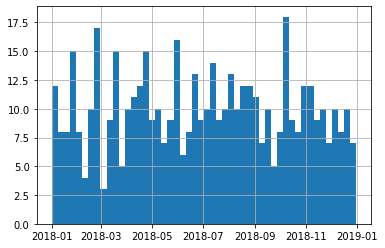

In [9]:
users['reg_date'].hist(bins=50)

<AxesSubplot:>

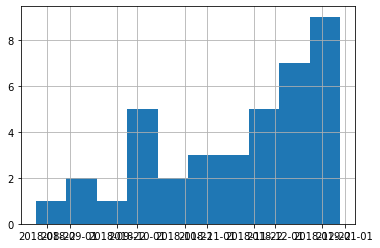

In [10]:
users['churn_date'].hist(bins=10)

In [11]:
users['churn_date'].count()

38

churn_date - дата прекращения пользования тарифом. С течением времени пользователи последовательно по возрастающей отказываются от пользования Мегалайном. 38 клиентов из 500 это довольно существенно и мы наблюдаем тенденцию к отказу от использования услугами Мегалайн.

***Звонки - calls:***

In [12]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


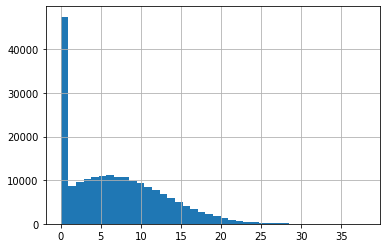

In [13]:
calls['duration'].hist(bins=40)
plt.show()

- Видим на гистограмме, что присутствует множество звонков в значении 0 минут, то есть звонки не осуществлялись или это пропущенные/непринятые звонки.
- преобразуем в целые минуты данные в столбце duration

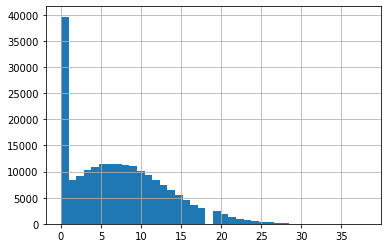

In [14]:
calls['duration'] = np.ceil(calls['duration']).astype('int64')
calls['duration'].hist(bins=40)
plt.show()

- Данные в столбце duration преобразованы успешно, но на гистограмме появился подозрительный провал в диапазоне 18 минут. Пока что допустим, что звонков с такой длительностью нет, далее изучим подробнее.

In [15]:
calls['user_id'].value_counts()

1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64

<AxesSubplot:>

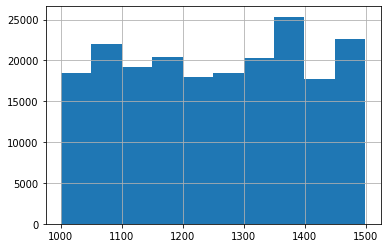

In [16]:
calls['user_id'].hist()

- в целом в столбце user_id сосредоточены пользователи с номерами от 1000 до 1500.

<AxesSubplot:>

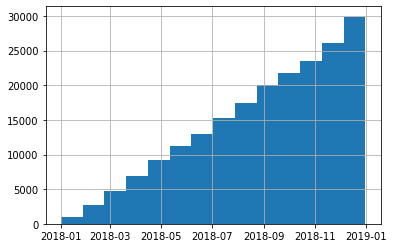

In [17]:
calls['call_date'].hist(bins=14)

***Интернет - internet***

- изменим формат даты session_date
- удалим лишний столбец Unnamed: 0

In [18]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet = internet.drop('Unnamed: 0', 1)
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


Проверим распределение интернет трафика (Мб) среди пользователей.

<AxesSubplot:>

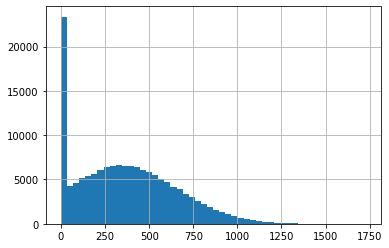

In [19]:
internet['mb_used'].hist(bins=50)

In [20]:
print('Количество интернет сессий:', len(internet['mb_used']))
print('Количество сессий с неиспользованным интернет трафиком:', len(internet.loc[internet['mb_used'] == 0]))

print('Доля сессий с неиспользованным интернет трафиком:', len(internet.loc[internet['mb_used'] == 0]) / len(internet['mb_used']))

Количество интернет сессий: 149396
Количество сессий с неиспользованным интернет трафиком: 19598
Доля сессий с неиспользованным интернет трафиком: 0.13118155773916304


Большинство пользователей расходует трафик в диапазоне от 0 до 1750 Мб. Также присутствует множество нулевых значений, то есть трафик не расходовался вообще. Возможно что те, кто не использовал интернет трафик - это пожилые пользователи или пользователи с устаревшими моделями телефонов, возможно имели место технические сбои. Доля сессий с неиспользованным интернет трафиком - 13%. Оставим данные без изменений, но учтем, что в дальнейшем это может внести свои искажения в выводы.

***Сообщения - messages***

In [21]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


- Данные в столбце message_date преобразованы успешно.

<AxesSubplot:>

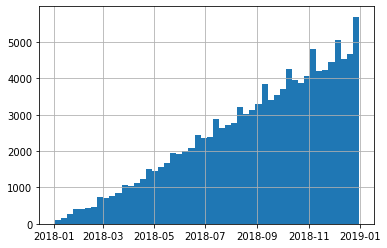

In [22]:
messages['message_date'].hist(bins=50)

In [23]:
messages['message_date'].value_counts()

2018-12-31    859
2018-12-30    765
2018-12-21    712
2018-12-29    702
2018-12-26    699
             ... 
2018-01-07     12
2018-01-05     10
2018-01-02     10
2018-01-04     10
2018-01-03      4
Name: message_date, Length: 364, dtype: int64

- количество дат сообщений возрастает с течением времени.
- на гистограмме зафиксирован период учетного времени с 2018 по 2019 года.

### 2.3 Расчёт дополнительных данных для пользователей

***2.3.1 количество сделанных звонков и израсходованных минут разговора по месяцам***

- добавляем месяц в таблицу calls по столбцу call_date методом  dt.month

In [24]:
calls['month'] = calls['call_date'].dt.month
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


- создадим сводную таблицу pivot_calls_month методом pivot_table(). 
- для каждого пользователя выведем количество звонков и израсходованных минут разговора  по месяцам

In [25]:
print('Количество звонков и израсходованных минут разговора по месяцам для пользователей:')
pivot_calls_month = (calls
                     .pivot_table(
                         index=['user_id', 'month'], # сгруппируем данные по столбцам user_id и month
                         values='duration', # значения, по которым мы хотим увидеть сводную таблицу 
                         aggfunc=['count', 'sum'])) # функции, применяемые к значениям
pivot_calls_month.columns = ['calls', 'minutes'] # меняем названия столбцов
display(pivot_calls_month.head(20).T)

Количество звонков и израсходованных минут разговора по месяцам для пользователей:


user_id 1000                                    1001      1002                 \
month     5    6    7    8    9    10   11   12   11   12   6    7    8    9    
calls     22   43   47   52   58   57   43   46   59   63   15   26   42   36   
minutes  159  172  340  408  466  350  338  333  430  414  117  214  289  206   

user_id                1003            
month     10   11   12   8    9    10  
calls     33   32   33   55  134  108  
minutes  212  243  236  380  961  855

***2.3.2 количество отправленных сообщений по месяцам***

- добавляем месяц (столбец month) в таблицу messages по столбцу message_date методом  dt.month

In [26]:
messages['month'] = messages['message_date'].dt.month
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [27]:
print('Количество сообщений по месяцам:')
pivot_messages_month = (messages
                     .pivot_table(
                         index=['user_id', 'month'], # сгруппируем данные по столбцам user_id и month 
                         values='id', # значения, по которым мы хотим увидеть сводную таблицу (id — уникальный номер сообщения)
                         aggfunc='count')) # функции, применяемые к значениям
pivot_messages_month.columns = ['messages'] # меняем названия столбца
display(pivot_messages_month.head(20).T)

Количество сообщений по месяцам:


user_id  1000                             1002                        1003  \
month      5   6   7   8   9   10  11  12   6   7   8  9   10  11  12   8    
messages   22  60  75  81  57  73  58  70    4  11  13  4  10  16  12   37   

user_id                   
month     9   10  11  12  
messages  91  83  94  75

***2.3.3 объем израсходованного интернет-трафика по месяцам***

*исходная таблица internet (информация об интернет-сессиях):*

- ***id*** — уникальный номер сессии
- ***mb_used*** — объём потраченного за сессию интернет-трафика (в мегабайтах)
- ***session_date*** — дата интернет-сессии
- ***user_id*** — идентификатор пользователя

- добавляем месяц (столбец month) в таблицу internet по столбцу session_date методом  dt.month

In [28]:
internet['month'] = internet['session_date'].dt.month
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


- создадим сводную таблицу, ведущую учет интернет трафика в Мб по месяцам
- создадим дополнительный столбец, ведущий учет по израсходованным Гб в месяц, с учетом округления "Мегалайн".
- ***gb_used_month*** — объём потраченного за месяц интернет-трафика (в гигабайтах)
- округляем мегабайты — до гигабайт в бо́льшую сторону за каждый месяц.
- меняем числа на целые в столбцах методом .astype()

In [29]:
print('Объем израсходованного интернет-трафика по месяцам:')
pivot_internet_month = (internet
                     .pivot_table(
                         index=['user_id', 'month'], # сгруппируем данные по столбцам user_id и month 
                         values=['mb_used'], # значения, по которым мы хотим увидеть сводную таблицу
                         aggfunc='sum')) # функции, применяемые к значениям
pivot_internet_month['gb_used_month'] = np.ceil(pivot_internet_month['mb_used']/1024).astype('int64')
display(pivot_internet_month.head(20).T)

Объем израсходованного интернет-трафика по месяцам:


user_id           1000                                                    \
month               5         6         7         8         9         10   
mb_used        2253.49  23233.77  14003.64  14055.93  14568.91  14702.49   
gb_used_month     3.00     23.00     14.00     14.00     15.00     15.00   

user_id                               1001                1002           \
month                11       12        11        12        6        7    
mb_used        14756.47  9817.61  18429.34  14036.66  10856.82  17580.1   
gb_used_month     15.00    10.00     18.00     14.00     11.00     18.0   

user_id                                                             1003  \
month                8         9         10        11        12       8    
mb_used        20319.26  16691.08  13888.25  18587.28  18113.73  8565.21   
gb_used_month     20.00     17.00     14.00     19.00     18.00     9.00   

user_id                            
month                9         10  
mb_used        12468.87  14768.14  
gb_used_month     13.00     15.00

<AxesSubplot:>

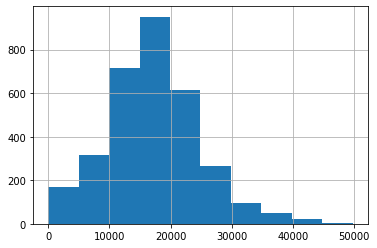

In [30]:
pivot_internet_month['mb_used'].hist(bins=10)

<AxesSubplot:>

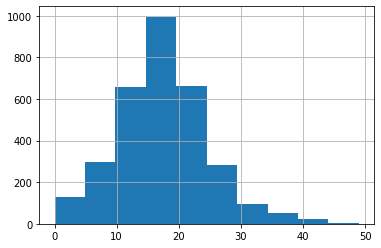

In [31]:
pivot_internet_month['gb_used_month'].hist(bins=10)

In [32]:
pivot_internet_month.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3203 entries, (1000, 5) to (1499, 12)
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mb_used        3203 non-null   float64
 1   gb_used_month  3203 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 79.7 KB


In [33]:
pivot_internet_month['gb_used_month'].value_counts().sort_values(ascending=False).head()

17    223
16    214
19    199
18    181
14    179
Name: gb_used_month, dtype: int64

***2.3.4 помесячная выручка с каждого пользователя***

Для вычисления помесячной прибыли с каждого пользователя:

- вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; 
- остаток умножим на значение из тарифного плана; 
- прибавим абонентскую плату, соответствующую тарифному плану

- соединим сводные таблицы траффика, сообщений и звонков по месяцам в общую сводную pivot

In [34]:
print('Сводная таблица интернет-траффика, сообщений и звонков по месяцам для пользователей:')
pivot = (pivot_internet_month 
         .join(pivot_messages_month, on=['user_id','month'])
         .join(pivot_calls_month, on=['user_id','month']))
display(pivot.head(20).T)

Сводная таблица интернет-траффика, сообщений и звонков по месяцам для пользователей:


user_id           1000                                                    \
month               5         6         7         8         9         10   
mb_used        2253.49  23233.77  14003.64  14055.93  14568.91  14702.49   
gb_used_month     3.00     23.00     14.00     14.00     15.00     15.00   
messages         22.00     60.00     75.00     81.00     57.00     73.00   
calls            22.00     43.00     47.00     52.00     58.00     57.00   
minutes         159.00    172.00    340.00    408.00    466.00    350.00   

user_id                               1001                1002           \
month                11       12        11        12        6        7    
mb_used        14756.47  9817.61  18429.34  14036.66  10856.82  17580.1   
gb_used_month     15.00    10.00     18.00     14.00     11.00     18.0   
messages          58.00    70.00       NaN       NaN      4.00     11.0   
calls             43.00    46.00     59.00     63.00     15.00     26.0   
minutes          338.00   333.00    430.00    414.00    117.00    214.0   

user_id                                                             1003  \
month                8         9         10        11        12       8    
mb_used        20319.26  16691.08  13888.25  18587.28  18113.73  8565.21   
gb_used_month     20.00     17.00     14.00     19.00     18.00     9.00   
messages          13.00      4.00     10.00     16.00     12.00    37.00   
calls             42.00     36.00     33.00     32.00     33.00    55.00   
minutes          289.00    206.00    212.00    243.00    236.00   380.00   

user_id                            
month                9         10  
mb_used        12468.87  14768.14  
gb_used_month     13.00     15.00  
messages          91.00     83.00  
calls            134.00    108.00  
minutes          961.00    855.00

In [35]:
# для дальнейшего объединения таблиц по столбцу тарифа - переименуем столбец тариф
tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True)
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [36]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Соберем все таблицы воедино (в два этапа) и назовем общую таблицу df.

- сначала объединим tariffs и users методом merge в таблице tariffs_users
- далее соберем pivot и tariffs_users в таблице df

In [37]:
print('Сводная таблица данных по тарифам для пользователей:')
tariffs_users = users.merge(tariffs, on='tariff', how='inner')
tariffs_users.head()

Сводная таблица данных по тарифам для пользователей:


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1
2,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1000,30720,3000,1950,150,1,1
3,1013,36,NaT,Иваново,Борис,Андреенко,2018-11-14,ultra,1000,30720,3000,1950,150,1,1
4,1016,58,NaT,Омск,Марица,Сазонова,2018-11-21,ultra,1000,30720,3000,1950,150,1,1


In [38]:
len(tariffs_users['user_id'].unique())

500

In [39]:
df = pivot.join(tariffs_users.set_index('user_id'), on='user_id', how='left')
#df = pivot.merge(tariffs_users.set_index('user_id'), on='user_id', how='outer')
df.head(10)

mb_used  gb_used_month  messages  calls  minutes  age  \
user_id month                                                           
1000    5       2253.49              3      22.0   22.0    159.0   52   
        6      23233.77             23      60.0   43.0    172.0   52   
        7      14003.64             14      75.0   47.0    340.0   52   
        8      14055.93             14      81.0   52.0    408.0   52   
        9      14568.91             15      57.0   58.0    466.0   52   
        10     14702.49             15      73.0   57.0    350.0   52   
        11     14756.47             15      58.0   43.0    338.0   52   
        12      9817.61             10      70.0   46.0    333.0   52   
1001    11     18429.34             18       NaN   59.0    430.0   41   
        12     14036.66             14       NaN   63.0    414.0   41   

              churn_date       city first_name  last_name   reg_date tariff  \
user_id month                                                                 
1000    5            NaT  Краснодар     Рафаил  Верещагин 2018-05-25  ultra   
        6            NaT  Краснодар     Рафаил  Верещагин 2018-05-25  ultra   
        7            NaT  Краснодар     Рафаил  Верещагин 2018-05-25  ultra   
        8            NaT  Краснодар     Рафаил  Верещагин 2018-05-25  ultra   
        9            NaT  Краснодар     Рафаил  Верещагин 2018-05-25  ultra   
        10           NaT  Краснодар     Рафаил  Верещагин 2018-05-25  ultra   
        11           NaT  Краснодар     Рафаил  Верещагин 2018-05-25  ultra   
        12           NaT  Краснодар     Рафаил  Верещагин 2018-05-25  ultra   
1001    11           NaT     Москва       Иван       Ежов 2018-11-01  smart   
        12           NaT     Москва       Иван       Ежов 2018-11-01  smart   

               messages_included  mb_per_month_included  minutes_included  \
user_id month                                                               
1000    5                   1000                  30720              3000   
        6                   1000                  30720              3000   
        7                   1000                  30720              3000   
        8                   1000                  30720              3000   
        9                   1000                  30720              3000   
        10                  1000                  30720              3000   
        11                  1000                  30720              3000   
        12                  1000                  30720              3000   
1001    11                    50                  15360               500   
        12                    50                  15360               500   

               rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute  
user_id month                                                                
1000    5                 1950         150                1               1  
        6                 1950         150                1               1  
        7                 1950         150                1               1  
        8                 1950         150                1               1  
        9                 1950         150                1               1  
        10                1950         150                1               1  
        11                1950         150                1               1  
        12                1950         150                1               1  
1001    11                 550         200                3               3  
        12                 550         200                3               3

In [40]:
df[df['mb_used'].isna()].head()

,,mb_used,gb_used_month,messages,calls,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
user_id,month,,,,,,,,,,,,,,,,,,,


In [41]:
len(df.unstack())

497

Таблица заметно увеличилась в размерах, зато теперь в ней собраны все необходимые для расчетов данные.  Приступим непосредственно к вычислению помесячной выручки с каждого пользователя.

- вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; 
- остаток умножим на значение из тарифного плана; 
- прибавим абонентскую плату, соответствующую тарифному плану

Чтобы не вносить искажения в расчетную прибыль далее в расчетах, выявим и избавимся от пропусков в 'calls', 'messages', 'minutes', 'mb_used'.

In [42]:
df[['calls', 'messages', 'minutes', 'mb_used']].isna().sum()

calls        40
messages    497
minutes      40
mb_used       0
dtype: int64

Заполним пропуски нулями.

In [43]:
df[['calls', 'messages', 'minutes', 'mb_used']] = df[['calls', 'messages', 'minutes', 'mb_used']].fillna(0)
df[['calls', 'messages', 'minutes', 'mb_used']].isna().sum()

calls       0
messages    0
minutes     0
mb_used     0
dtype: int64

Создадим функцию `pay_per_month`, для расчета суммарной ежемесячной прибыли, где:
- **pay_calls** - ежемесячная прибыль за звонки
- **pay_message** - ежемесячная прибыль за сообщения
- **pay_internet** - ежемесячная прибыль за интернет трафик
- **pay_month**  - суммарная ежемесячная прибыль за звонки, сообщения, интернет трафик

In [44]:
def pay_per_month(row):
    
    row['pay_month'] = 0
    
    pay_calls = (row['minutes'] - row['minutes_included']) * row['rub_per_minute']
    if pay_calls < 0: pay_calls = 0
        
    pay_message = (row['messages'] - row['messages_included']) * row['rub_per_message']
    if pay_message < 0: pay_message = 0  
        
    pay_internet = np.ceil((row['mb_used'] - row['mb_per_month_included'])/1024) * row['rub_per_gb']
    if pay_internet < 0: pay_internet = 0      
        
    row['pay_month'] += pay_calls + pay_message + pay_internet
    
    return row['pay_month']

Применим функцию `pay_per_month` ко всей таблице `df` и создадим дополнительные столбцы:

- **profit_month** - чистая прибыль за месяц (переплата пользователей сверх пакета услуг).
- **payed_month_rub** - всего оплачено за месяц (помесячная выручка)

In [45]:
df['profit_month'] = df.apply(pay_per_month, axis=1) # axis=1 вдоль колонки

In [46]:
df['payed_month_rub'] = df['profit_month'] + df['rub_monthly_fee']

In [47]:
df.tail()

mb_used  gb_used_month  messages  calls  minutes  age  \
user_id month                                                           
1498    10     20579.36             21      42.0   41.0    247.0   68   
1499    9       1845.75              2      11.0    9.0     70.0   35   
        10     17788.51             18      48.0   68.0    449.0   35   
        11     17963.31             18      59.0   74.0    612.0   35   
        12     13055.58             13      66.0   69.0    492.0   35   

              churn_date         city first_name last_name  ... tariff  \
user_id month                                               ...          
1498    10    2018-10-25  Владикавказ   Всеволод   Акимчин  ...  smart   
1499    9            NaT        Пермь     Гектор  Корнилов  ...  smart   
        10           NaT        Пермь     Гектор  Корнилов  ...  smart   
        11           NaT        Пермь     Гектор  Корнилов  ...  smart   
        12           NaT        Пермь     Гектор  Корнилов  ...  smart   

              messages_included  mb_per_month_included  minutes_included  \
user_id month                                                              
1498    10                   50                  15360               500   
1499    9                    50                  15360               500   
        10                   50                  15360               500   
        11                   50                  15360               500   
        12                   50                  15360               500   

               rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute  \
user_id month                                                                 
1498    10                 550         200                3               3   
1499    9                  550         200                3               3   
        10                 550         200                3               3   
        11                 550         200                3               3   
        12                 550         200                3               3   

               profit_month  payed_month_rub  
user_id month                                 
1498    10           1200.0           1750.0  
1499    9               0.0            550.0  
        10            600.0           1150.0  
        11            963.0           1513.0  
        12             48.0            598.0  

[5 rows x 21 columns]

In [48]:
df[['rub_monthly_fee', 'profit_month', 'payed_month_rub']].head(20).T

user_id            1000                                                  \
month                5       6       7       8       9       10      11   
rub_monthly_fee  1950.0  1950.0  1950.0  1950.0  1950.0  1950.0  1950.0   
profit_month        0.0     0.0     0.0     0.0     0.0     0.0     0.0   
payed_month_rub  1950.0  1950.0  1950.0  1950.0  1950.0  1950.0  1950.0   

user_id                    1001          1002                                \
month                12      11     12     6       7       8      9      10   
rub_monthly_fee  1950.0   550.0  550.0  550.0   550.0   550.0  550.0  550.0   
profit_month        0.0   600.0    0.0    0.0   600.0  1000.0  400.0    0.0   
payed_month_rub  1950.0  1150.0  550.0  550.0  1150.0  1550.0  950.0  550.0   

user_id                            1003                  
month                11      12      8       9       10  
rub_monthly_fee   550.0   550.0  1950.0  1950.0  1950.0  
profit_month      800.0   600.0     0.0     0.0     0.0  
payed_month_rub  1350.0  1150.0  1950.0  1950.0  1950.0

In [49]:
#проверка на пропуски
df['profit_month'].isna().sum()


0

In [50]:
# ищем пропуски
df[df['payed_month_rub'].isna()].head()

,,mb_used,gb_used_month,messages,calls,minutes,age,churn_date,city,first_name,last_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,profit_month,payed_month_rub
user_id,month,,,,,,,,,,,,,,,,,,,,,


In [51]:
#проверка на "мертвые души"
df.query('calls == 0 and messages == 0 and mb_used == 0')

,,mb_used,gb_used_month,messages,calls,minutes,age,churn_date,city,first_name,last_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,profit_month,payed_month_rub
user_id,month,,,,,,,,,,,,,,,,,,,,,


Искомые данные успешно внесены в таблицу df.

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3203 entries, (1000, 5) to (1499, 12)
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   mb_used                3203 non-null   float64       
 1   gb_used_month          3203 non-null   int64         
 2   messages               3203 non-null   float64       
 3   calls                  3203 non-null   float64       
 4   minutes                3203 non-null   float64       
 5   age                    3203 non-null   int64         
 6   churn_date             186 non-null    datetime64[ns]
 7   city                   3203 non-null   object        
 8   first_name             3203 non-null   object        
 9   last_name              3203 non-null   object        
 10  reg_date               3203 non-null   datetime64[ns]
 11  tariff                 3203 non-null   object        
 12  messages_included      3203 non-null   int64    

- Произведена предобработка данных. Исправлены некорректные типы данных в столбцах с датами. Произведена проверка на дубликаты.
- Довольно часто встречаются пользователи, не использующие все функции тарифа в определенные месяцы. В частности это более 20 тыс из 150 тыс (округлено) пользователей кто не пользуется интернетом. Также порядка 40 тыс звонков из приблизительно 200 тыс оказываются пропущены. Тем не менее отсутствуют пользователи, которые вообще не пользуются тарифом, так называемые условно "мертвые души". Это значит, что данные корректны и на основании нашей выборки можно производить исследование.
- Искомые значения помесячной прибыли **profit_month** и помесячной выручки **payed_month_rub** для каждого клиента внесены и объединены в общей таблице **df**.

## 3. Анализ Данных

- Опишите поведение клиентов оператора, исходя из выборки. 
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
- Посчитайте среднее количество, дисперсию и стандартное отклонение. 
- Постройте гистограммы. 
- Опишите распределения.

Сначала взглянем на общий облик пользователей, без разделения по тарифам.

In [53]:
df[['minutes', 'messages', 'mb_used']].describe()

,minutes,messages,mb_used
count,3203.000000,3203.000000,3203.000000
mean,452.086481,38.325944,17266.708626
std,241.841479,36.191375,7516.356902
min,0.000000,0.000000,0.000000
25%,285.000000,9.000000,12526.905000
50%,444.000000,30.000000,16963.110000
75%,589.000000,57.000000,21432.175000
max,1673.000000,224.000000,49745.690000


Значения выглядят вполне правдоподобно на первый взгляд. Медианные значения не сильно отличаются от средних и за год такие результаты допустимы.

Сравним тарифы между собой при помощи таблицы tariffs_users.

In [54]:
tariffs_users.head(1)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


Почитаем сколько пользователей на какой тариф приходится

Доли пользователей тарифов:


,users,%
smart,351,70.2
ultra,149,29.8


Text(0.5, 1.0, 'Доли тарифов')

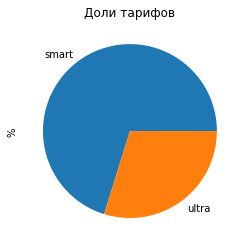

In [55]:
tariffs_users_part = tariffs_users['tariff'].value_counts().to_frame() # to_frame() для преобразования series в DataFrame
tariffs_users_part.columns = ['users'] # переименовываем столбец
tariffs_users_part['%'] = ((tariffs_users_part['users']/500)*100).round(1) # процентное соотношение пользователей
print('Доли пользователей тарифов:')
display(tariffs_users_part)
tariffs_users_part['%'].plot.pie(figsize=(4, 4));
plt.title('Доли тарифов')

Большинство клиентов (70,2%) отдает предпочтение тарифу smart. Ничего удивительного, поскольку второй тариф ultra почти в 4 раза дороже. Но это только на первый взгляд. Действительно ли smart дешевле выясним далее в исследовании.

Можно предположить, что пользователи тарифа smart это пользователи эконом сегмента, а пользователи тарифа ultra премиум сегмента.

Сохраним в переменных **smart_tariff** и **ultra_tariff** данные из таблицы **df** с выборкой по каждому из тарифов.

In [56]:
smart_users = df[df['tariff']=='smart']
ultra_users = df[df['tariff']=='ultra']

Посмотрим сколько мегабайт интернета, сообщений и минут разговора потребляет группа пользователей тарифа smart каждый месяц.
Данные сохраним в переменной **pivot_smart**.

In [57]:
pivot_smart = (smart_users
               .pivot_table(
                   index='month', 
                   values=['minutes','messages','mb_used','profit_month', 'payed_month_rub'], 
                   aggfunc='sum'))
pivot_smart.T

month,1,2,3,4,5,6,7,8,9,10,11,12
mb_used,289466.4,672629.15,1163020.25,1507764.23,2228530.99,2590322.27,3164373.22,3903519.22,4238930.49,4926594.13,5339040.14,6104304.11
messages,620.0,1397.00,2453.00,3443.00,4762.00,5478.00,6784.00,7904.00,8746.00,9927.00,10768.00,12130.00
minutes,6931.0,17324.00,30034.00,41119.00,54618.00,64885.00,82079.00,98995.00,111439.00,125284.00,137544.00,161275.00
payed_month_rub,24525.0,48001.00,89676.00,107866.00,168849.00,197459.00,246014.00,309790.00,324986.00,401267.00,424403.00,531965.00
profit_month,5825.0,16101.00,47326.00,46266.00,91299.00,107259.00,135464.00,181090.00,181986.00,239567.00,250603.00,346615.00


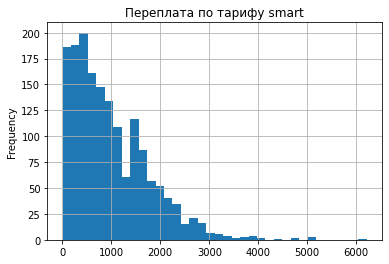

In [58]:
df.query('tariff == "smart" and profit_month > 0').plot(y='profit_month', kind='hist',
                                                        title='Переплата по тарифу smart',
                                                        bins=36, legend=False, grid=True)
plt.show()

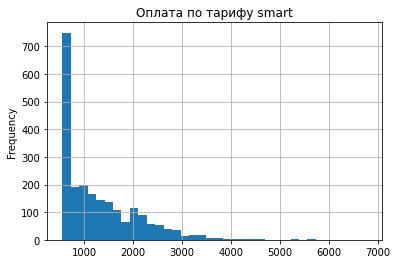

In [59]:
df.query('tariff == "smart" and payed_month_rub > 0').plot(y='payed_month_rub', kind='hist',
                                                        title='Оплата по тарифу smart',
                                                        bins=36, legend=False, grid=True)
plt.show()

Пользователи тарифа регулярно значительно превышают лимиты тарифа, причем иногда в несколько раз и приносят прибыль компании Мегалайн.

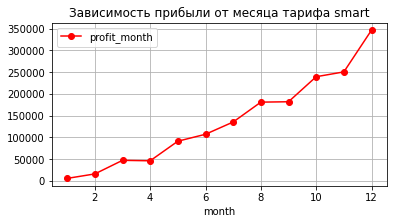

In [60]:
(pivot_smart
 .pivot_table(index='month', values='profit_month', aggfunc='mean')
 .plot(style='-or', figsize=(6, 3), title='Зависимость прибыли от месяца тарифа smart', grid=True)
)
plt.show()

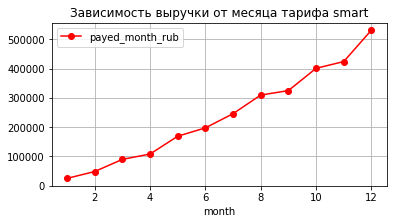

In [61]:
(pivot_smart
 .pivot_table(index='month', values='payed_month_rub', aggfunc='mean')
 .plot(style='-or', figsize=(6, 3), title='Зависимость выручки от месяца тарифа smart', grid=True)
)
plt.show()

C течением времени прибыль компании Мегалайн только возрастает. Видим как с момента начала исследования прибыль по 'эконом' тарифу smart возросла с 5 тыс. р. до 350 т.р. в месяц. И это только для 350 человек. То есть под конец периода исследования выборки 1 пользователь тарифа приносил дополнительную выручку в 1 т.р., что означает что перерасход в бюджете среднего клиента почти в два раза превышает лимиты тарифа. Интересно выяснить причины такой доходности. Каких конкретно ресурсов тарифа не хватает пользователю? Ведь такая переплата может спровоцировать недовольство клиента и уход к конкурентам. Неужели получается, что наш эконом тариф совсем не эконом?

<AxesSubplot:>

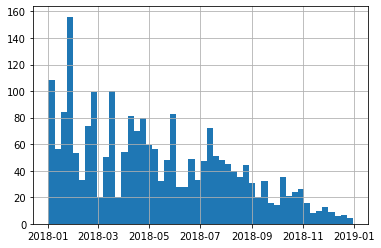

In [62]:
smart_users['reg_date'].hist(bins=50)

Сравнивая графики общей выручки и прибыли мы наблюдаем, что в целом они очень похожи между собой по характеру роста, но имеются небольшие отличия - в марте месяце(2018-03)  и августе (2018-08) прибыль не возрастала, тогда как выручка шла вверх. Это может говорить о том, что в эти месяцы регистрировалось меньше пользователей.

Определим коэффициент корреляции Пирсона для каждой пары параметров при помощи функции corr(). Иными словами определим зависимость прибыли от интернет траффика, количества сообщений и разговоров.

In [63]:
corr_smart = smart_users[['minutes','messages','mb_used','profit_month', 'payed_month_rub']]
corr_smart.corr().round(2)

,minutes,messages,mb_used,profit_month,payed_month_rub
minutes,1.00,0.20,0.34,0.42,0.42
messages,0.20,1.00,0.15,0.13,0.13
mb_used,0.34,0.15,1.00,0.85,0.85
profit_month,0.42,0.13,0.85,1.00,1.00
payed_month_rub,0.42,0.13,0.85,1.00,1.00


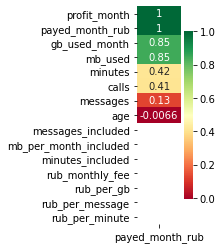

In [64]:
plt.figure(figsize=(1,4))
sns.heatmap(smart_users.corr()[['payed_month_rub']].sort_values(by='payed_month_rub',
                                                               ascending=False),
                                                               cmap='RdYlGn', 
                                                               annot=True,
                                                               annot_kws={'size':10})
plt.show()

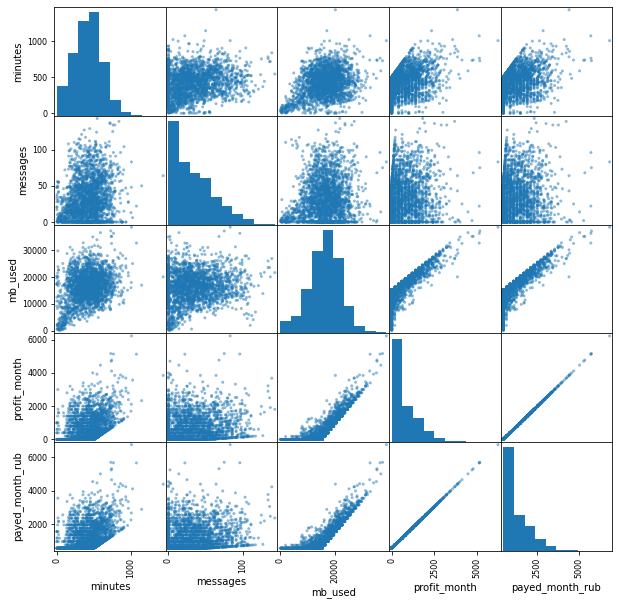

In [65]:
pd.plotting.scatter_matrix(corr_smart, figsize=(10, 10))
plt.show()

Более всего выручка в тарифе смарт зависит от потребления интернет траффика(почти прямая зависимость), в меньше степени от минут разговора и не так ощутимо от сообщений. Далее посмотрим подробнее зависимость оплаты от интернет траффика.

In [66]:
pivot_smart.describe().T

,count,mean,std,min,25%,50%,75%,max
mb_used,12.0,3.010708e+06,1.914643e+06,289466.4,1421578.235,2877347.745,4410846.40,6104304.11
messages,12.0,6.201000e+03,3.790949e+03,620.0,3195.500,6131.000,9041.25,12130.00
minutes,12.0,7.762725e+04,4.991080e+04,6931.0,38347.750,73482.000,114900.25,161275.00
payed_month_rub,12.0,2.395668e+05,1.616968e+05,24525.0,103318.500,221736.500,344056.25,531965.00
profit_month,12.0,1.374501e+05,1.054869e+05,5825.0,47061.000,121361.500,196381.25,346615.00


Аналогично оценим сколько мегабайт интернета, сообщений и минут разговора группа пользователей тарифа ultra каждый месяц.
Данные сохраним в переменной **pivot_ultra**.

In [67]:
pivot_ultra = (ultra_users
               .pivot_table(
                   index='month', 
                   values=['minutes','messages','mb_used','profit_month', 'payed_month_rub'], 
                   aggfunc='sum'))
pivot_ultra.T

month,1,2,3,4,5,6,7,8,9,10,11,12
mb_used,118266.13,282622.5,648815.36,925547.39,1297331.25,1589694.9,1865105.53,2094637.85,2208491.87,2465576.49,2651432.87,3029250.99
messages,304.00,522.0,1195.00,1736.00,2515.00,3467.0,4499.00,5142.00,5981.00,7152.00,7447.00,8386.00
minutes,3853.00,6939.0,18117.00,25191.00,33972.00,40065.0,49414.00,54400.00,61813.00,68329.00,72273.00,82140.00
payed_month_rub,17550.00,43500.0,74550.00,110100.00,136050.00,169350.0,190800.00,220950.00,230850.00,252150.00,278400.00,295350.00
profit_month,0.00,600.0,2400.00,2850.00,7350.00,7500.0,15300.00,14250.00,8550.00,14250.00,19050.00,26250.00


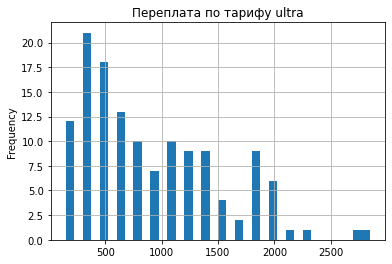

In [68]:
df.query('tariff == "ultra" and profit_month > 0').plot(y='profit_month', kind='hist',
                                                        title='Переплата по тарифу ultra',
                                                        bins=36, legend=False, grid=True)
plt.show()

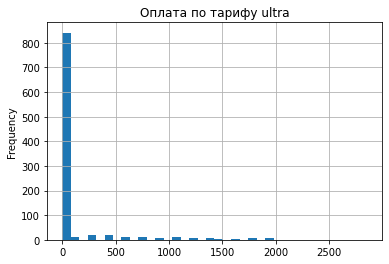

In [69]:
df.query('tariff == "ultra" and payed_month_rub > 0').plot(y='profit_month', kind='hist',
                                                        title='Оплата по тарифу ultra',
                                                        bins=36, legend=False, grid=True)
plt.show()

Пользователи тарифа ultra в целом гораздо меньше склонны к переплате, но тем не менее порой и они бывают вынуждены оплачивать дополнительные функции тарифа.

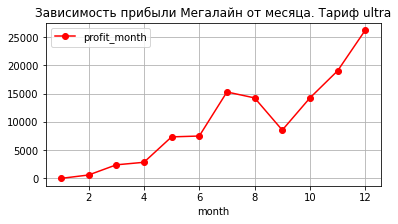

In [70]:
(pivot_ultra
 .pivot_table(index='month', values='profit_month', aggfunc='mean')
 .plot(style='-or', figsize=(6, 3), title='Зависимость прибыли Мегалайн от месяца. Тариф ultra', grid=True)
)
plt.show()

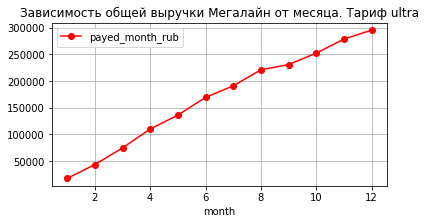

In [71]:
(pivot_ultra
 .pivot_table(index='month', values='payed_month_rub', aggfunc='mean')
 .plot(style='-or', figsize=(6, 3), title='Зависимость общей выручки Мегалайн от месяца. Тариф ultra', grid=True)
)
plt.show()

<AxesSubplot:>

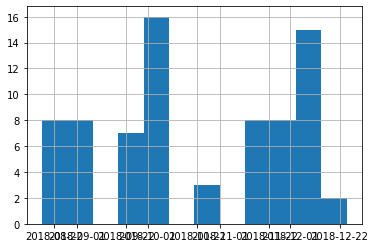

In [72]:
ultra_users['churn_date'].hist(bins=12) # вспомним про отток клиентов

Как и в тарифе ultra прибыль для компании Мегалайн возрастает. Но соответственно с увеличением прибыли Мегалайн увеличивается отток клиентов. По всей видимости клиенты недовольны переплатой за услуги и переходят к конкурентам или на другой тариф.

In [73]:
corr_ultra = ultra_users[['minutes','messages','mb_used','profit_month', 'payed_month_rub']]
corr_ultra.corr().round(2)

,minutes,messages,mb_used,profit_month,payed_month_rub
minutes,1.00,0.08,0.16,0.09,0.09
messages,0.08,1.00,0.17,0.02,0.02
mb_used,0.16,0.17,1.00,0.63,0.63
profit_month,0.09,0.02,0.63,1.00,1.00
payed_month_rub,0.09,0.02,0.63,1.00,1.00


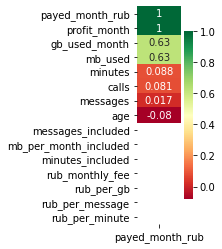

In [74]:
plt.figure(figsize=(1,4))
sns.heatmap(ultra_users.corr()[['payed_month_rub']].sort_values(by='payed_month_rub',
                                                               ascending=False),
                                                               cmap='RdYlGn', 
                                                               annot=True,
                                                               annot_kws={'size':10})
plt.show()

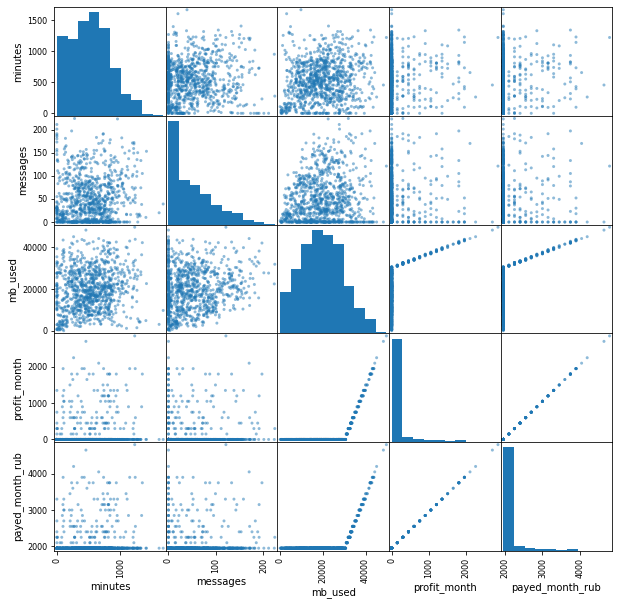

In [75]:
pd.plotting.scatter_matrix(corr_ultra, figsize=(10, 10))
plt.show()

In [76]:
pivot_ultra.describe()

,mb_used,messages,minutes,payed_month_rub,profit_month
count,1.200000e+01,12.000000,12.000000,12.000000,12.000000
mean,1.598064e+06,4028.833333,43042.166667,168300.000000,9862.500000
std,9.517939e+05,2824.589973,25962.805402,92443.289741,8104.828107
min,1.182661e+05,304.000000,3853.000000,17550.000000,0.000000
25%,8.563644e+05,1600.750000,23422.500000,101212.500000,2737.500000
50%,1.727400e+06,3983.000000,44739.500000,180075.000000,8025.000000
75%,2.272763e+06,6273.750000,63442.000000,236175.000000,14512.500000
max,3.029251e+06,8386.000000,82140.000000,295350.000000,26250.000000


Итак, мы наблюдаем усредненные показатели по метрикам для тарифа за год для группы в 351 человек. Для ответа на искомый вопрос необходимо вывести среднее для каждого из 12 месяцев для каждого пользователя.

### 3.1 Анализ минут разговора

In [77]:
df[['minutes']].describe().T

,count,mean,std,min,25%,50%,75%,max
minutes,3203.0,452.086481,241.841479,0.0,285.0,444.0,589.0,1673.0


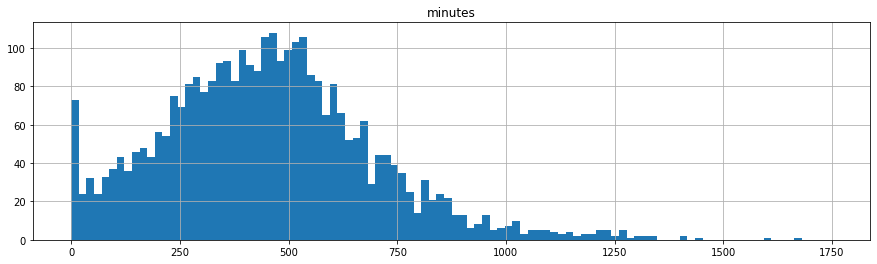

In [78]:
df.hist('minutes', bins=100, figsize=(15,4), range = (0, 1750))
plt.show()

<AxesSubplot:xlabel='minutes', ylabel='profit_month'>

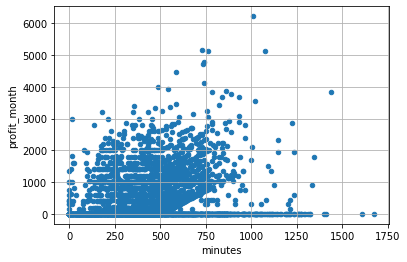

In [79]:
df.plot(x='minutes', y='profit_month', kind='scatter', grid=True)

<AxesSubplot:>

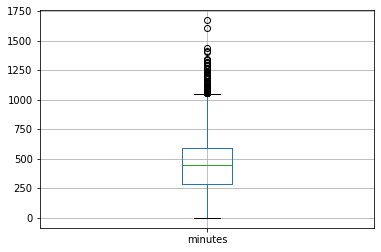

In [80]:
df.boxplot('minutes')

В среднем по всем тарифам клиенты использовали 450 минут разговора за год. 
 Максимальное значение 1673 минут, но это скорее исключение. Большинство пользователей укладывается в 1100 минут.

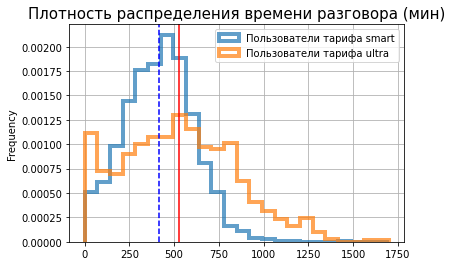

In [81]:
ax = smart_users.plot(kind = 'hist',
                          y = 'minutes',
                          histtype = 'step',       # тип для сравнения двух гистограмм
                          bins = 24,
                          range = (0, 1700),
                          alpha = 0.7,
                          linewidth = 4,           # ширина графика
                          grid = True,
                          density = True,          # выводим плотность распределения данных
                          legend = True,           # выводим пояснение для графиков
                          label = 'Пользователи тарифа smart'  # строка подписи для графиков
                         )
ultra_users.plot(kind = 'hist',
                            y = 'minutes',
                            histtype = 'step',
                            ax = ax,               # выводим график в осях предыдущей гистограммы
                            bins = 24,
                            range = (0, 1700),
                            alpha = 0.7,
                            linewidth = 4,
                            grid = True,
                            density = True,
                            legend = True,
                            label = 'Пользователи тарифа ultra'
                           )
ax.set_title('Плотность распределения времени разговора (мин)', fontsize=15)
plt.axvline(np.mean(smart_users['minutes']),color='b', linestyle='--', label='smart среднее')
plt.axvline(np.mean(ultra_users['minutes']),color='r', linestyle='-', label='ultra среднее')
plt.show()

In [82]:
#Посчитаем среднее, медиану, дисперсию и среднее отклонение для тарифа smart
for column in corr_smart[['minutes']]:    
    print('Среднее smart {}: {:.0f}'.format(column,corr_smart[column].mean()))
    print('Медиана smart {}: {:.0f}'.format(column,corr_smart[column].median()))
    print('Дисперсия smart {}: {:.0f}'.format(column,np.var(corr_smart[column])))
    print('Среднее отклонение smart {}: {:.0f} \n'.format(column, np.std(corr_smart[column])))
    
#Посчитаем среднее, медиану, дисперсию и среднее отклонение для тарифа ultra
for column in corr_ultra[['minutes']]:    
    print('Среднее ultra {}: {:.0f}'.format(column,corr_ultra[column].mean()))
    print('Медиана ultra {}: {:.0f}'.format(column,corr_ultra[column].median()))
    print('Дисперсия ultra {}: {:.0f}'.format(column,np.var(corr_ultra[column])))
    print('Среднее отклонение ultra {}: {:.0f} \n'.format(column, np.std(corr_ultra[column])))

Среднее smart minutes: 418
Медиана smart minutes: 422
Дисперсия smart minutes: 36159
Среднее отклонение smart minutes: 190 

Среднее ultra minutes: 530
Медиана ultra minutes: 520
Дисперсия ultra minutes: 100780
Среднее отклонение ultra minutes: 317 



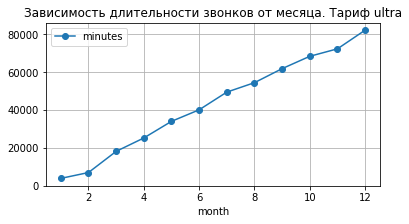

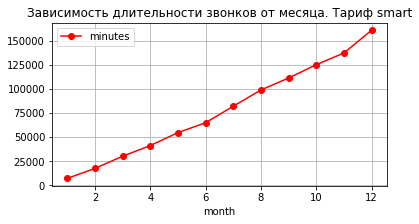

In [83]:
(pivot_ultra
 .pivot_table(index='month', values='minutes', aggfunc='mean')
 .plot(style='-o', figsize=(6, 3), title='Зависимость длительности звонков от месяца. Тариф ultra', grid=True)
)
plt.show()

(pivot_smart
 .pivot_table(index='month', values='minutes', aggfunc='mean')
 .plot(style='-or', figsize=(6, 3), title='Зависимость длительности звонков от месяца. Тариф smart', grid=True)
)
plt.show()

Оценим распределение при помощи диаграммы размаха

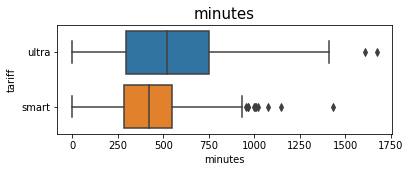

In [84]:
for column in df[['minutes']]:
    plt.figure(figsize=(6,2))
    plt.title(column, fontsize=15)
    sns.boxplot(data=df, x=column, y='tariff')

Пользователям smart не хватает лимитных 500 минут разговора, поскольку медианное значение находится на отметке в 450 минут разговора, а 4й квартиль приближается к 1000 минут. Тогда как ultra укладываются в установленные тарифом рамки в 3000 минут, причем даже не выбирая половины отведенных минут. Возможно имеет смысл рассмотреть вариант повысить лимиты минут на тарифе smart. Но опять же в зависимости от того, чему мы будем в данном случае отдавать приоритет - выручке компании или удовлетворенности пользователей тарифом. Не стоит забывать, что от удовлетворенности клиентов зависит их отток churn_date, как мы выясняли ранее. Можно также рассмотреть вариант нового тарифа с пересмотренной стоимостью, где будут учтены фактические лимиты использования тарифа smart. 

Подведем итог. Для образа клиента по тарифу временные границы можно обозначить следующим образом:

    - 1500 минут достаточно для пользователей тарифа ultra
    - 900 минут достаточно для пользователей тарифа smart

### 3.2 Анализ количества сообщений

In [85]:
df[['messages']].describe().T

,count,mean,std,min,25%,50%,75%,max
messages,3203.0,38.325944,36.191375,0.0,9.0,30.0,57.0,224.0


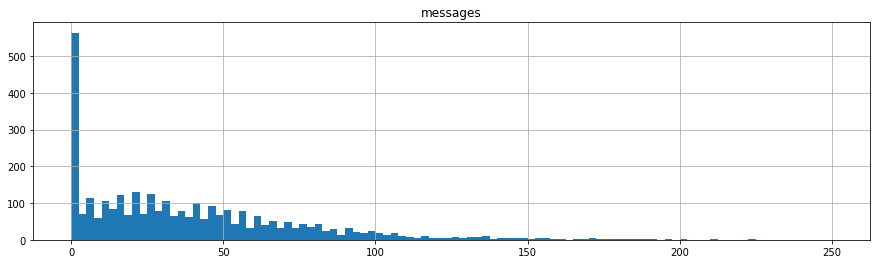

In [86]:
df.hist('messages', bins=100, figsize=(15,4), range = (0, 250))
plt.show() 

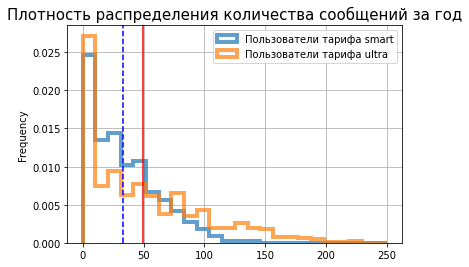

In [87]:
ax = smart_users.plot(kind = 'hist',
                          y = 'messages',
                          histtype = 'step',       # тип для сравнения двух гистограмм
                          bins = 24,
                          range = (0, 250),
                          alpha = 0.7,
                          linewidth = 4,           # ширина графика
                          grid = True,
                          density = True,          # выводим плотность распределения данных
                          legend = True,           # выводим пояснение для графиков
                          label = 'Пользователи тарифа smart'  # строка подписи для графиков
                         )
ultra_users.plot(kind = 'hist',
                            y = 'messages',
                            histtype = 'step',
                            ax = ax,               # выводим график в осях предыдущей гистограммы
                            bins = 24,
                            range = (0, 250),
                            alpha = 0.7,
                            linewidth = 4,
                            grid = True,
                            density = True,
                            legend = True,
                            label = 'Пользователи тарифа ultra'
                           )
ax.set_title('Плотность распределения количества сообщений за год', fontsize=15)
plt.axvline(np.mean(smart_users['messages']),color='b', linestyle='--', label='smart среднее')
plt.axvline(np.mean(ultra_users['messages']),color='r', linestyle='-', label='ultra среднее')
plt.show()

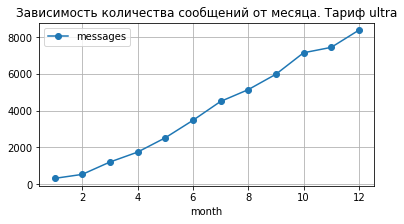

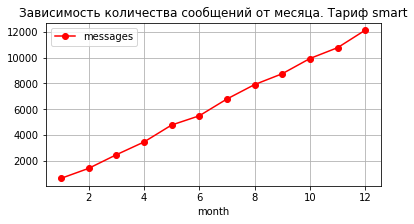

In [88]:
(pivot_ultra
 .pivot_table(index='month', values='messages', aggfunc='mean')
 .plot(style='-o', figsize=(6, 3), title='Зависимость количества сообщений от месяца. Тариф ultra', grid=True)
)
plt.show()

(pivot_smart
 .pivot_table(index='month', values='messages', aggfunc='mean')
 .plot(style='-or', figsize=(6, 3), title='Зависимость количества сообщений от месяца. Тариф smart', grid=True)
)
plt.show()

In [89]:
#Посчитаем среднее, медиану, дисперсию и среднее отклонение для тарифа smart
for column in corr_smart[['messages']]:    
    print('Среднее smart {}: {:.0f}'.format(column,corr_smart[column].mean()))
    print('Медиана smart {}: {:.0f}'.format(column,corr_smart[column].median()))
    print('Дисперсия smart {}: {:.0f}'.format(column,np.var(corr_smart[column])))
    print('Среднее отклонение smart {}: {:.0f} \n'.format(column, np.std(corr_smart[column])))
    
#Посчитаем среднее, медиану, дисперсию и среднее отклонение для тарифа ultra
for column in corr_ultra[['messages']]:    
    print('Среднее ultra {}: {:.0f}'.format(column,corr_ultra[column].mean()))
    print('Медиана ultra {}: {:.0f}'.format(column,corr_ultra[column].median()))
    print('Дисперсия ultra {}: {:.0f}'.format(column,np.var(corr_ultra[column])))
    print('Среднее отклонение ultra {}: {:.0f} \n'.format(column, np.std(corr_ultra[column])))

Среднее smart messages: 33
Медиана smart messages: 28
Дисперсия smart messages: 796
Среднее отклонение smart messages: 28 

Среднее ultra messages: 50
Медиана ultra messages: 38
Дисперсия ultra messages: 2300
Среднее отклонение ultra messages: 48 



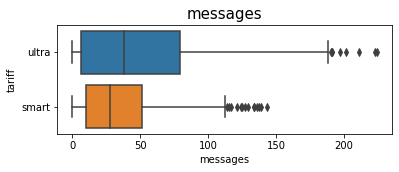

In [90]:
for column in df[['messages']]:
    plt.figure(figsize=(6,2))
    plt.title(column, fontsize=15)
    sns.boxplot(data=df, x=column, y='tariff')

<AxesSubplot:xlabel='messages', ylabel='profit_month'>

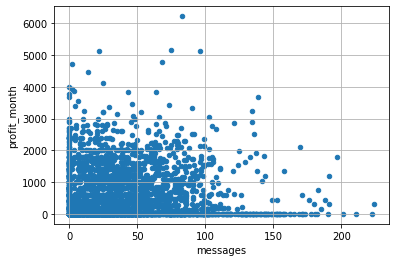

In [91]:
df.plot(x='messages', y='profit_month', kind='scatter', grid=True)

Пользователей тарифа ultra не потребляют и пятой доли отведенных тарифом сообщений. Тогда как пользователи smart превышают лимиты почти в два раза. Потребление функции сообщений в разных группах по сообщениям в целом схоже, разве что ultra чуть более активные пользователи. Почти одинаковая доля пользователей в разных тарифах вообще не использует или мало использует функцию сообщений. Медианные значения также не сильно разнятся, практически на одном значении от 30 до 50 сообщений, грубо говоря 40 сообщений. Также заметно как пользователи smart стараются ограничивать себя в отправке дополнительных сообщений после превышения лимита в 50 сообщений.

Для образа клиента по тарифу и количеству сообщений можно выделить, что:

- 200 сообщений достаточно для пользователей тарифа ultra
- 110 сообщений достаточно для пользователей тарифа smart

### 3.3 Анализ интернет трафика

In [92]:
df[['mb_used']].describe().T

,count,mean,std,min,25%,50%,75%,max
mb_used,3203.0,17266.708626,7516.356902,0.0,12526.905,16963.11,21432.175,49745.69


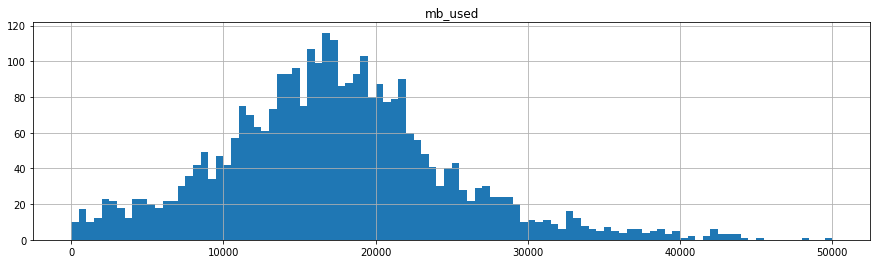

In [93]:
df.hist('mb_used', bins=100, figsize=(15,4), range = (0, 50000))
plt.show()

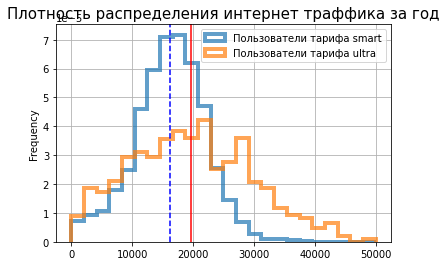

In [94]:
ax = smart_users.plot(kind = 'hist',
                          y = 'mb_used',
                          histtype = 'step',       # тип для сравнения двух гистограмм
                          bins = 24,
                          range = (0, 50000),
                          alpha = 0.7,
                          linewidth = 4,           # ширина графика
                          grid = True,
                          density = True,          # выводим плотность распределения данных
                          legend = True,           # выводим пояснение для графиков
                          label = 'Пользователи тарифа smart'  # строка подписи для графиков
                         )
ultra_users.plot(kind = 'hist',
                            y = 'mb_used',
                            histtype = 'step',
                            ax = ax,               # выводим график в осях предыдущей гистограммы
                            bins = 24,
                            range = (0, 50000),
                            alpha = 0.7,
                            linewidth = 4,
                            grid = True,
                            density = True,
                            legend = True,
                            label = 'Пользователи тарифа ultra'
                           )
ax.set_title('Плотность распределения интернет траффика за год', fontsize=15)

plt.axvline(np.mean(smart_users['mb_used']),color='b', linestyle='--', label='smart среднее')
plt.axvline(np.mean(ultra_users['mb_used']),color='r', linestyle='-', label='ultra среднее')

plt.show()

In [95]:
#Посчитаем среднее, медиану, дисперсию и среднее отклонение для тарифа smart
print('Показатели потребления интернет траффика(mb) для тарифа smart:')
for column in corr_smart[['mb_used']]:    
    print('Среднее {}: {:.0f}'.format(column,corr_smart[column].mean()))
    print('Медиана {}: {:.0f}'.format(column,corr_smart[column].median()))
    print('Дисперсия {}: {:.0f}'.format(column,np.var(corr_smart[column])))
    print('Среднее отклонение {}: {:.0f} \n'.format(column, np.std(corr_smart[column])))
    
#Посчитаем среднее, медиану, дисперсию и среднее отклонение для тарифа ultra
print('Показатели потребления интернет траффика(mb) для тарифа ultra:')
for column in corr_ultra[['mb_used']]:    
    print('Среднее {}: {:.0f}'.format(column,corr_ultra[column].mean()))
    print('Медиана {}: {:.0f}'.format(column,corr_ultra[column].median()))
    print('Дисперсия {}: {:.0f}'.format(column,np.var(corr_ultra[column])))
    print('Среднее отклонение {}: {:.0f} \n'.format(column, np.std(corr_ultra[column])))

Показатели потребления интернет траффика(mb) для тарифа smart:
Среднее mb_used: 16216
Медиана mb_used: 16508
Дисперсия mb_used: 34344530
Среднее отклонение mb_used: 5860 

Показатели потребления интернет траффика(mb) для тарифа ultra:
Среднее mb_used: 19668
Медиана mb_used: 19394
Дисперсия mb_used: 98762850
Среднее отклонение mb_used: 9938 



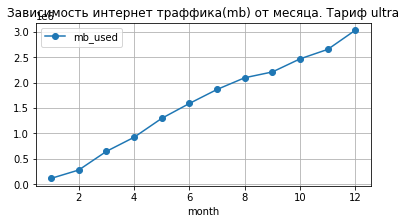

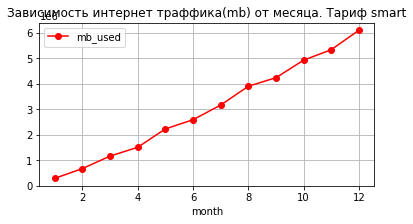

In [96]:
(pivot_ultra
 .pivot_table(index='month', values='mb_used', aggfunc='mean')
 .plot(style='-o', figsize=(6, 3), title='Зависимость интернет траффика(mb) от месяца. Тариф ultra', grid=True)
)
plt.show()

(pivot_smart
 .pivot_table(index='month', values='mb_used', aggfunc='mean')
 .plot(style='-or', figsize=(6, 3), title='Зависимость интернет траффика(mb) от месяца. Тариф smart', grid=True)
)
plt.show()

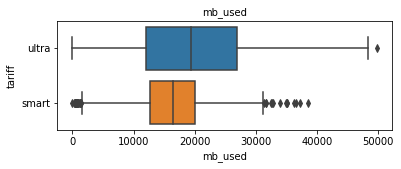

In [97]:
for column in df[['mb_used']]:
    plt.figure(figsize=(6,2))
    plt.title(column, fontsize=10)
    sns.boxplot(data=df, x=column, y='tariff')

<AxesSubplot:xlabel='mb_used', ylabel='profit_month'>

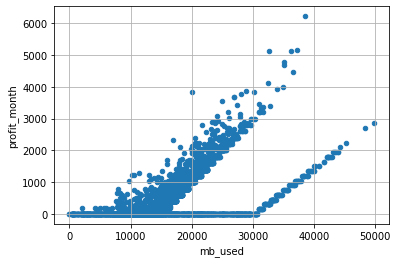

In [98]:
df.plot(x='mb_used', y='profit_month', kind='scatter', grid=True)

Заметно, как резко вырастает прибыль компании после ограничительных значений тарифов в 15 и 30 Гб. Всем однозначно не хватает интернета. И пользователям ultra в меньшей степени, но также стоит учесть что в категории ultra меньше пользователей. Это более активные потребители интернет траффика. Цифровизация в 2018 году только набирает обороты и дальше пользователям вполне вероятно будет требоваться гораздо больше интернет траффика.

### 3.4 Анализ выручки по тарифам

In [99]:
df[['profit_month', 'payed_month_rub']].describe().T

,count,mean,std,min,25%,50%,75%,max
profit_month,3203.0,551.904777,768.410902,0.0,0.0,171.0,939.5,6220.0
payed_month_rub,3203.0,1528.067749,799.087045,550.0,750.0,1649.0,1950.0,6770.0


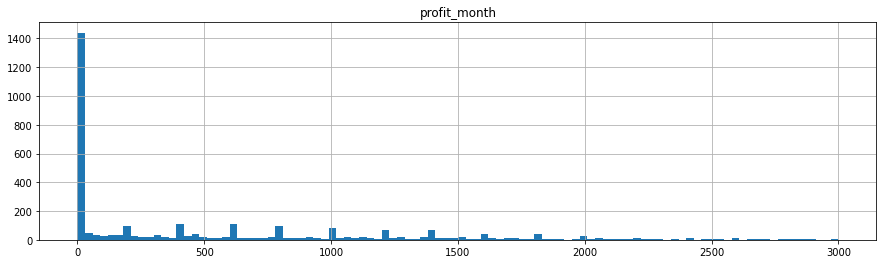

In [100]:
df.hist('profit_month', bins=100, figsize=(15,4), range = (0, 3000))
plt.show()

In [101]:
smart_users_profit = smart_users['profit_month'].value_counts().sort_values(ascending = False).to_frame()
smart_users_profit

,profit_month
0.0,566
400.0,87
600.0,80
800.0,78
200.0,71
...,...
1013.0,1
426.0,1
1023.0,1
446.0,1


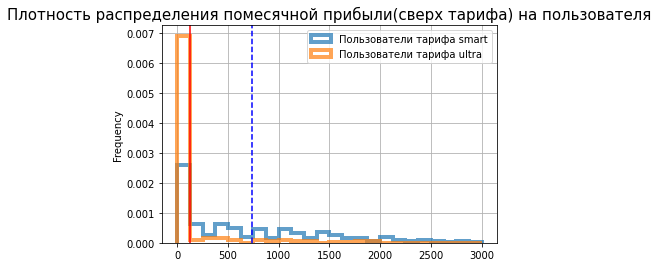

In [102]:
ax = smart_users.plot(kind = 'hist',
                          y = 'profit_month',
                          histtype = 'step',       # тип для сравнения двух гистограмм
                          bins = 24,
                          range = (0, 3000),
                          alpha = 0.7,
                          linewidth = 4,           # ширина графика
                          grid = True,
                          density = True,          # выводим плотность распределения данных
                          legend = True,           # выводим пояснение для графиков
                          label = 'Пользователи тарифа smart'  # строка подписи для графиков
                         )
ultra_users.plot(kind = 'hist',
                            y = 'profit_month',
                            histtype = 'step',
                            ax = ax,               # выводим график в осях предыдущей гистограммы
                            bins = 24,
                            range = (0, 3000),
                            alpha = 0.7,
                            linewidth = 4,
                            grid = True,
                            density = True,
                            legend = True,
                            label = 'Пользователи тарифа ultra'
                           )
ax.set_title('Плотность распределения помесячной прибыли(сверх тарифа) на пользователя', fontsize=15)

plt.axvline(np.mean(smart_users['profit_month']),color='b', linestyle='--', label='smart среднее')
plt.axvline(np.mean(ultra_users['profit_month']),color='r', linestyle='-', label='ultra среднее')

plt.show()

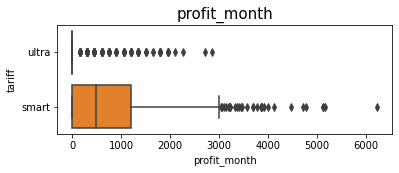

In [103]:
for column in df[['profit_month']]:
    plt.figure(figsize=(6,2))
    plt.title(column, fontsize=15)
    sns.boxplot(data=df, x=column, y='tariff')

In [104]:
#Посчитаем среднее, медиану, дисперсию и среднее отклонение для тарифа smart
print('Показатели прибыли для тарифа smart:')
for column in corr_smart[['profit_month']]:    
    print('Среднее {}: {:.0f}'.format(column,corr_smart[column].mean()))
    print('Медиана {}: {:.0f}'.format(column,corr_smart[column].median()))
    print('Дисперсия {}: {:.0f}'.format(column,np.var(corr_smart[column])))
    print('Среднее отклонение {}: {:.0f} \n'.format(column, np.std(corr_smart[column])))
    
#Посчитаем среднее, медиану, дисперсию и среднее отклонение для тарифа ultra
print('Показатели прибыли для тарифа ultra:')
for column in corr_ultra[['profit_month']]:    
    print('Среднее {}: {:.0f}'.format(column,corr_ultra[column].mean()))
    print('Медиана {}: {:.0f}'.format(column,corr_ultra[column].median()))
    print('Дисперсия {}: {:.0f}'.format(column,np.var(corr_ultra[column])))
    print('Среднее отклонение {}: {:.0f} \n'.format(column, np.std(corr_ultra[column])))

Показатели прибыли для тарифа smart:
Среднее profit_month: 740
Медиана profit_month: 476
Дисперсия profit_month: 669540
Среднее отклонение profit_month: 818 

Показатели прибыли для тарифа ultra:
Среднее profit_month: 121
Медиана profit_month: 0
Дисперсия profit_month: 142673
Среднее отклонение profit_month: 378 



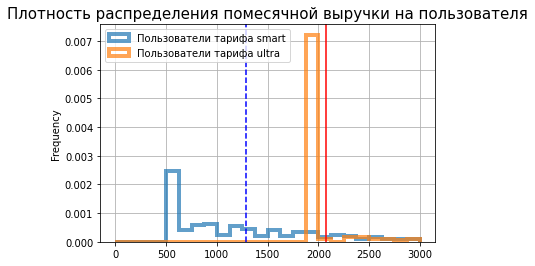

In [105]:
ax = smart_users.plot(kind = 'hist',
                          y = 'payed_month_rub',
                          histtype = 'step',       # тип для сравнения двух гистограмм
                          bins = 24,
                          range = (0, 3000),
                          alpha = 0.7,
                          linewidth = 4,           # ширина графика
                          grid = True,
                          density = True,          # выводим плотность распределения данных
                          legend = True,           # выводим пояснение для графиков
                          label = 'Пользователи тарифа smart'  # строка подписи для графиков
                         )
ultra_users.plot(kind = 'hist',
                            y = 'payed_month_rub',
                            histtype = 'step',
                            ax = ax,               # выводим график в осях предыдущей гистограммы
                            bins = 24,
                            range = (0, 3000),
                            alpha = 0.7,
                            linewidth = 4,
                            grid = True,
                            density = True,
                            legend = True,
                            label = 'Пользователи тарифа ultra'
                           )
ax.set_title('Плотность распределения помесячной выручки на пользователя', fontsize=15)

plt.axvline(np.mean(smart_users['payed_month_rub']),color='b', linestyle='--', label='smart среднее')
plt.axvline(np.mean(ultra_users['payed_month_rub']),color='r', linestyle='-', label='ultra среднее')

plt.show()

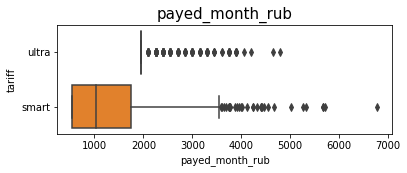

In [106]:
for column in df[['payed_month_rub']]:
    plt.figure(figsize=(6,2))
    plt.title(column, fontsize=15)
    sns.boxplot(data=df, x=column, y='tariff')

Видим, что большинство пользователей тарифа ultra укладывается в рамки тарифа, тогда как значительная часть пользователей smart переплачивает сверх установленного лимита.

Доли выручки пользователей по тарифам, тыс. руб.:


,Выручка за год,"Выручка, %"
tariff,,
smart,2874801.0,58.7
ultra,2019600.0,41.3


Text(0.5, 1.0, 'Доли выручки пользователей по тарифам, тыс. руб.:')

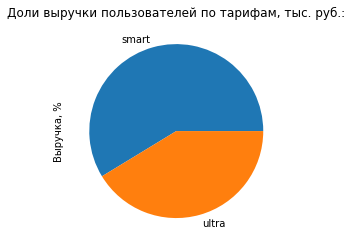

In [107]:
total_pay = df.groupby('tariff')['payed_month_rub'].sum().to_frame()
total_pay.columns = ['Выручка за год']
print('Доли выручки пользователей по тарифам, тыс. руб.:')
total_pay['Выручка, %'] = ((total_pay['Выручка за год']/ (df['payed_month_rub'].sum()))*100).round(1)
display(total_pay)
total_pay['Выручка, %'].plot.pie(figsize=(4, 4));
plt.title('Доли выручки пользователей по тарифам, тыс. руб.:')

,payed_month_rub,%
city,,
Москва,466650.0,9.5
Санкт-Петербург,130800.0,2.7
Новосибирск,85950.0,1.8
Пенза,84000.0,1.7
Краснодар,79950.0,1.6
Воронеж,71850.0,1.5
Уфа,58650.0,1.2
Брянск,54900.0,1.1
Пермь,50850.0,1.0


Text(0.5, 1.0, 'Доли выручки пользователей тарифа ultra по городам, %:')

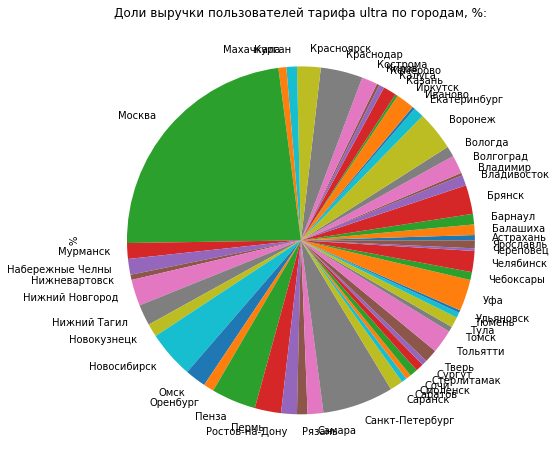

In [108]:
town_df = ultra_users.pivot_table(index='city', 
                             values='payed_month_rub', 
                             aggfunc='sum')
town_df['%'] = ((town_df['payed_month_rub']/ (df['payed_month_rub'].sum()))*100).round(1)
display(town_df.sort_values(by='payed_month_rub', ascending=False).head(10))
town_df['%'].plot.pie(figsize=(8, 8));
plt.title('Доли выручки пользователей тарифа ultra по городам, %:')

,payed_month_rub,%
city,,
Москва,478392.0,9.8
Санкт-Петербург,306182.0,6.3
Ульяновск,101236.0,2.1
Новосибирск,88592.0,1.8
Казань,88243.0,1.8
Уфа,87112.0,1.8
Вологда,69920.0,1.4
Набережные Челны,69712.0,1.4
Улан-Удэ,69276.0,1.4


Text(0.5, 1.0, 'Доли выручки пользователей тарифа smart по городам, %:')

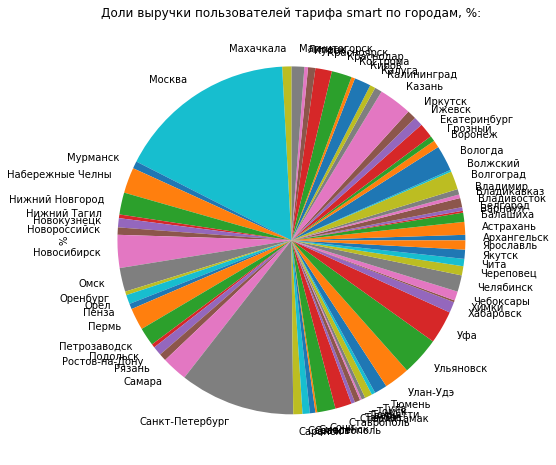

In [109]:
town_df = smart_users.pivot_table(index='city', 
                             values='payed_month_rub', 
                             aggfunc='sum')
town_df['%'] = ((town_df['payed_month_rub']/ (df['payed_month_rub'].sum()))*100).round(1)
display(town_df.sort_values(by='payed_month_rub', ascending=False).head(10))
town_df['%'].plot.pie(figsize=(8, 8));
plt.title('Доли выручки пользователей тарифа smart по городам, %:')

### Вывод
- Подавляющее большинство пользователей тарифа ultra укладывается в установленные рамки тарифа, причем с большим запасом по количеству минут и сообщений, тогда как значительная часть пользователей smart(условно половина клиентов)  переплачивает сверх установленного лимита.
- Несмотря на преимущество в численности пользователей тарифа smart (70%) и регулярную переплату в 50% стоимости, финальная выручка между группами пользователей тарифов не сильно различается, ввиду высокой ежемесячной стоимости тарифа ultra. Всего 30 % от общего числа пользователей ultra приносят общую выручку в 41 %, остальные 59% выручки приходится на клиентов smart.
- Большинство пользователей тарифов сосредоточены в городах мегаполисах и выручка распределяется в целом равномерно по городам. Тем не менее заметно, что в Санкт-Петербурге меньше в два раза пользователей дорогостоящего тарифа ultra, нежели smart. Когда как в Москве равные доли пользователей в разных тарифах. Это может свидетельствовать об обеспеченности жителей столицы и о просадке доходов жителей северной столицы относительно Москвы. Тем не менее во всех городах есть определенный процент людей готовых платить как за ultra, так и за smart. Далее проверим гипотезу о различии средней выручки между пользователями из Москвы и других регионов.
- Нельзя однозначно сказать, что какой то из представленных тарифов лучше или хуже. Каждый находит своего пользователя.
- Возможно на основании анализа скорректировать параметры по тарифам для удовлетворенности пользователей. Но опять же это стоит делать на основании преследуемых целей, поскольку с одной стороны компания может потерять прибыль, с другой стороны - клиентов.


## 4. Проверка гипотез

### 4.1 Статистический анализ средней выручки пользователей различных тарифов

Проверим гипотезу о различии средней выручки пользователей тарифов «Ультра» и «Смарт»:

- Нулевая гипотеза H₀: Средняя выручка пользователей тарифов Смарт и Ультра не различается
- Альтернативная гипотеза H₁: Средняя выручка пользователей тарифов Смарт и Ультра различается

Для проверки гипотезы о равенстве среднего двух независимых генеральных совокупностей по взятым из них выборкам применим тест Стьюдента:

In [110]:
alpha = .05 # уровень значимости

result = st.ttest_ind(smart_users['payed_month_rub'], ultra_users['payed_month_rub'], equal_var=False)

print('p-значение = ', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
    
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение =  5.22403940028982e-249
Отвергаем нулевую гипотезу


Выбираем альтернативную гипотезу H₁: Средняя выручка пользователей тарифов Смарт и Ультра различается.

Ранее мы это неоднократно наблюдали, например на следующем графике. Продубируем для наглядности.

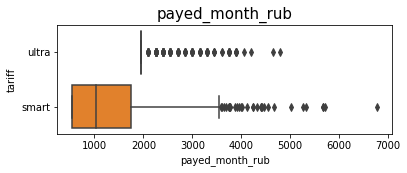

In [111]:
for column in df[['payed_month_rub']]:
    plt.figure(figsize=(6,2))
    plt.title(column, fontsize=15)
    sns.boxplot(data=df, x=column, y='tariff')

Для окончательного подтверждения гипотезы "H₁: Средняя выручка пользователей тарифов Смарт и Ультра различается", возьмем ранее сгруппированные данные по тарифам, далее сгруппируем по пользователям и среднемесячной выручке с каждого пользователя.

In [112]:
smart_groupby_users = (smart_users
                .groupby('user_id')['payed_month_rub'] # группировка данных по пользователям
                .agg('mean')                           # среднемесячная выручка с каждого пользователя
                )
ultra_groupby_users = (ultra_users
                .groupby('user_id')['payed_month_rub']
                .agg('mean')
                )

print('Среднемесячная выручка пользователей smart: ', smart_groupby_users.mean())
print('Среднемесячная выручка пользователей ultra: ', ultra_groupby_users.mean())
print('Разница среднемесячной выручки smart и ultra: ', smart_groupby_users.mean()-ultra_groupby_users.mean())

Среднемесячная выручка пользователей smart:  1324.7190192743763
Среднемесячная выручка пользователей ultra:  2087.3929896633977
Разница среднемесячной выручки smart и ultra:  -762.6739703890214


### 4.2 Статистический анализ средней выручки пользователей из Москвы и других регионов

Проверим гипотезу о различии средней выручки между пользователями из Москвы и других регионов.

- Нулевая гипотеза H₀: Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
- Альтернативная гипотеза H₁: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [113]:
moscow_users = df[df['city']=='Москва']['payed_month_rub']
not_moscow_users = df[df['city']!='Москва']['payed_month_rub']

print('Средняя выручка Москва: ', moscow_users.mean())
print('Средняя выручка остальные города: ', not_moscow_users.mean())
print('Разница средней выручки Москвы и остальных городов: ', moscow_users.mean()-not_moscow_users.mean())

Средняя выручка Москва:  1546.7135842880523
Средняя выручка остальные города:  1523.6724537037037
Разница средней выручки Москвы и остальных городов:  23.041130584348593


In [114]:
alpha = .05 # уровень значимости

results = st.ttest_ind(moscow_users, not_moscow_users, equal_var = False)

print('p-значение:', results.pvalue) #вероятность получить наблюдаемый результат


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5023167352991608
Не получилось отвергнуть нулевую гипотезу


По результатам теста мы видим, что средняя выручка пользователей с Москвы не отличается от выручки пользователей из других регионов.

## 5. Общий вывод

- Произведен анализ данных по выборке клиентов компании «Мегалайн» с тарифами *ultra* и *smart*. Осуществлена предобработка данных в соответствии с техническим заданием. Необходимые типы данных преимущественно в области дат преобразованы, пропуски и данные с нулевыми значениями оставлены без изменений.
- Для каждого клиента рассчитаны по месяцам: Количество сделанных звонков, израсходованных минут разговора, отправленных сообщений, использованного инернет-трафика, а также помесячная выручка. Результаты сохранены в сводных таблицах.

- Были проверены предложенные статистические гипотезы и сделаны следующие выводы:
        1) Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
        2) Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

Пользователи тарифа **smart**:
    
- включают в себя 70% от общего количества клиентов (351 клиент из 500)
- сгенерировали 58.7% годовой выручки (2,875 млн.р.)
- существенная часть пользователей ежемесячно переплачивает сумму, сравнимую с еще одной абонентской платой в 550 р.
- ежемесячно выбирают лимиты по времени разговора в 500 минут.
- удовлетворены лимитом отведенных тарифных 50 сообщений.
- компенсируют недостаток интернет трафика покупкой дополнительных Gb сверх пакета услуг.

Пользователи тарифа **ultra**:
    
- включают в себя 30% от общего количества клиентов (149 клиентов из 500)
- сгенерировали 41.3% годовой выручки (2,02 млн.р.)
- преимущественно укладываются в абонентскую плату в 1950 р.
- не выбирают даже половину тарифных 3000 минут разговора.
- в общей массе не расходуют даже четверти тарифных 1000 сообщений.
- преимущестенно укладываются в тарифные 30 Гб интернет траффика.

Как компромиссный вариант для привлечения новых групп и удержания старых пользователей возможно рассмотреть промежуточный вариант тарифа, который учтет реальные запросы клиентов и поможет компании увеличить выручку. Есть различные вариации такого тарифа, но главный акцент предложения стоит делать на интернет траффике. Рекомендованные параметры такого тарифа: 

1. Ежемесячная плата: 1200 рублей
2. Включено 750 минут разговора, 100 сообщений и 25 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
   - минута разговора: 2 рубля
   - сообщение: 2 рубля
   - 1 Гб интернет-трафика: 150 рублей
   
Относительно тарифа smart пользователи ultra в общей массе потребляют на 33% больше интернет-трафика, совершают на 40% больше звонков и отправляют на 45% больше сообщений, а также не превышают лимит пакета услуг, в отличие от пользователей тарифа Смарт. Благодаря большему количеству пользователей и превышению лимитов по тарифу группа пользователей тарифа smart по результатам анализа приносит на 30% больше годовой выручки, чем ultra, но если привлечь дополнительных пользователей к тарифу ultra, то ситуация может значительно измениться. 

Таким образом выявлено, что в среднем ежемесячно каждый отдельный пользователь тарифа **ultra** приносит на 43% больше дохода компании "Мегалайн", нежели пользователь тарифа **smart**. Следовательно тариф **ultra** предпочтительней для продвижения.